<a href="https://colab.research.google.com/github/pedrohcmds/analise_vacinacoes/blob/main/notebooks/analise_dados_vacinacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação dos dados

In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv('https://raw.githubusercontent.com/pedrohcmds/analise_vacinacoes/main/dados/dados_vacinacoes.csv',
            sep=';', encoding='ISO-8859-1', skiprows=3,skipfooter=19, decimal=',', engine='python')
dados.head()

,Ano,072 BCG,099 Hepatite B em crianças até 30 dias,061 Rotavírus Humano,053 Meningococo C,073 Hepatite B,080 Penta,012 Pneumocócica,074 Poliomielite,100 Poliomielite 4 anos,006 Febre Amarela,096 Hepatite A,091 Pneumocócica(1º ref),092 Meningococo C (1º ref),093 Poliomielite(1º ref),021 Tríplice Viral D1,098 Tríplice Viral D2,097 Tetra Viral(SRC+VZ),075 DTP,102 DTP REF (4 e 6 anos),103 Dupla Adulto (dt),095 Tríplice Bacteriana(DTP)(1º ref),018 Sarampo,009 Haemophilus influenzae b,094 Dupla adulto e tríplice acelular gestante,003 dTpa gestante,Total
0,1994,1442773,-,-,-,144614,-,-,951598,-,86149,-,-,-,-,-,-,-,1058103,-,-,-,1165982,-,-,-,4849219
1,1995,3118425,-,-,-,316010,-,-,2341912,-,144732,-,-,-,-,-,-,-,2423578,-,-,-,2613843,4,-,-,10958504
2,1996,3250708,-,-,-,514762,-,-,2522390,-,176228,-,-,-,-,-,-,-,2441053,-,-,-,2508162,452,-,-,11413755
3,1997,3709941,-,-,-,183338,-,-,2827700,-,248265,-,-,-,-,-,-,-,2486541,-,-,-,3440381,1042,-,-,12897208
4,1998,3568228,-,-,-,403949,-,-,3046858,-,591149,-,-,-,-,-,-,-,2972400,-,-,-,3045492,26714,-,-,13654790


# Limpeza e Análise exploraória

In [4]:
dados.index = dados['Ano']

In [5]:
dados.drop('Ano', axis=1, inplace=True)

In [6]:
dados.tail()

,072 BCG,099 Hepatite B em crianças até 30 dias,061 Rotavírus Humano,053 Meningococo C,073 Hepatite B,080 Penta,012 Pneumocócica,074 Poliomielite,100 Poliomielite 4 anos,006 Febre Amarela,096 Hepatite A,091 Pneumocócica(1º ref),092 Meningococo C (1º ref),093 Poliomielite(1º ref),021 Tríplice Viral D1,098 Tríplice Viral D2,097 Tetra Viral(SRC+VZ),075 DTP,102 DTP REF (4 e 6 anos),103 Dupla Adulto (dt),095 Tríplice Bacteriana(DTP)(1º ref),018 Sarampo,009 Haemophilus influenzae b,094 Dupla adulto e tríplice acelular gestante,003 dTpa gestante,Total
Ano,,,,,,,,,,,,,,,,,,,,,,,,,,
2016,2843993,2433100,2648372,2728699,3130964,2657003,2827520,2513077,-,1286769,2130512,2502625,2793142,2212417,2839666,2283169,2352531,2664547,150122,-,1913131,-,-,938567,1006439,46856365
2017,2890591,2535899,2519664,2590757,2568458,2493687,2725289,2508194,6624,1347678,2471902,2370918,2444389,2322737,2703996,2275578,1097158,2500636,157712,5689961,2211157,-,-,1028778,1260726,50722489
2018,2789273,2475488,2561930,2497445,2651880,2486063,2666835,2516533,5371,1648260,2345053,2283717,2275442,2052164,2622897,2183221,926437,2492050,107262,6132388,1926224,-,-,1342030,1799803,50787766
2019,1547820,1412844,1533955,1568800,1635183,1453810,1591326,1506818,1854,1144755,1522917,1476340,1612675,1341320,1672026,1414126,656702,1457432,53753,4171330,1131487,-,-,877068,1197981,31982322
Total,81684240,14067937,33391981,24391126,60563803,18150707,23575129,72702010,13849,28967446,13033884,16461738,16934519,15595236,61351515,15180261,10894106,66279719,900636,15993679,14830062,26135326,7480155,8250384,6922916,653752364


In [7]:
dados_sem_total = dados.drop('Total', axis= 0)
dados_sem_total = dados_sem_total.drop('Total', axis=1)

In [8]:
dados_sem_total.head()

,072 BCG,099 Hepatite B em crianças até 30 dias,061 Rotavírus Humano,053 Meningococo C,073 Hepatite B,080 Penta,012 Pneumocócica,074 Poliomielite,100 Poliomielite 4 anos,006 Febre Amarela,096 Hepatite A,091 Pneumocócica(1º ref),092 Meningococo C (1º ref),093 Poliomielite(1º ref),021 Tríplice Viral D1,098 Tríplice Viral D2,097 Tetra Viral(SRC+VZ),075 DTP,102 DTP REF (4 e 6 anos),103 Dupla Adulto (dt),095 Tríplice Bacteriana(DTP)(1º ref),018 Sarampo,009 Haemophilus influenzae b,094 Dupla adulto e tríplice acelular gestante,003 dTpa gestante
Ano,,,,,,,,,,,,,,,,,,,,,,,,,
1994,1442773,-,-,-,144614,-,-,951598,-,86149,-,-,-,-,-,-,-,1058103,-,-,-,1165982,-,-,-
1995,3118425,-,-,-,316010,-,-,2341912,-,144732,-,-,-,-,-,-,-,2423578,-,-,-,2613843,4,-,-
1996,3250708,-,-,-,514762,-,-,2522390,-,176228,-,-,-,-,-,-,-,2441053,-,-,-,2508162,452,-,-
1997,3709941,-,-,-,183338,-,-,2827700,-,248265,-,-,-,-,-,-,-,2486541,-,-,-,3440381,1042,-,-
1998,3568228,-,-,-,403949,-,-,3046858,-,591149,-,-,-,-,-,-,-,2972400,-,-,-,3045492,26714,-,-


In [9]:
dados_sem_total.tail()

,072 BCG,099 Hepatite B em crianças até 30 dias,061 Rotavírus Humano,053 Meningococo C,073 Hepatite B,080 Penta,012 Pneumocócica,074 Poliomielite,100 Poliomielite 4 anos,006 Febre Amarela,096 Hepatite A,091 Pneumocócica(1º ref),092 Meningococo C (1º ref),093 Poliomielite(1º ref),021 Tríplice Viral D1,098 Tríplice Viral D2,097 Tetra Viral(SRC+VZ),075 DTP,102 DTP REF (4 e 6 anos),103 Dupla Adulto (dt),095 Tríplice Bacteriana(DTP)(1º ref),018 Sarampo,009 Haemophilus influenzae b,094 Dupla adulto e tríplice acelular gestante,003 dTpa gestante
Ano,,,,,,,,,,,,,,,,,,,,,,,,,
2015,3049524,2638871,2767095,2849450,2836595,2794548,2734464,2852556,-,1324453,2816967,2563692,2549172,2452459,2787903,2319769,2245170,2811624,141724,-,2489336,-,-,1322415,1304918
2016,2843993,2433100,2648372,2728699,3130964,2657003,2827520,2513077,-,1286769,2130512,2502625,2793142,2212417,2839666,2283169,2352531,2664547,150122,-,1913131,-,-,938567,1006439
2017,2890591,2535899,2519664,2590757,2568458,2493687,2725289,2508194,6624,1347678,2471902,2370918,2444389,2322737,2703996,2275578,1097158,2500636,157712,5689961,2211157,-,-,1028778,1260726
2018,2789273,2475488,2561930,2497445,2651880,2486063,2666835,2516533,5371,1648260,2345053,2283717,2275442,2052164,2622897,2183221,926437,2492050,107262,6132388,1926224,-,-,1342030,1799803
2019,1547820,1412844,1533955,1568800,1635183,1453810,1591326,1506818,1854,1144755,1522917,1476340,1612675,1341320,1672026,1414126,656702,1457432,53753,4171330,1131487,-,-,877068,1197981


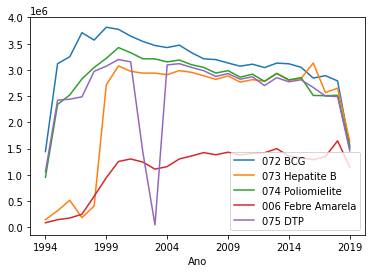

In [10]:
dados_sem_total.plot()

## Tratando Index

## Investigando outliers - 2003 DTP

Primeiro é importante invesigar o que é DTP, segundo o governo do [Estado de São Paulo](https://www.saopaulo.sp.gov.br/eventos/saude-secretaria-faz-alteracao-no-calendario-de-vacinacao-para-2003/), é a vacina tripla contra difteria, coqueluxe e tétano. 

A mesma notícia que traz a informação sobre o que é a DTP alerta sobre a mudança do calendário de vacinação 


In [11]:
dados_sem_total['075 DTP']

Ano
1994    1058103
1995    2423578
1996    2441053
1997    2486541
1998    2972400
1999    3071205
2000    3197754
2001    3153708
2002    1435465
2003      44906
2004    3094882
2005    3118403
2006    3047459
2007    2985030
2008    2875316
2009    2929654
2010    2822824
2011    2868892
2012    2701830
2013    2851107
2014    2773320
2015    2811624
2016    2664547
2017    2500636
2018    2492050
2019    1457432
Name: 075 DTP, dtype: int64

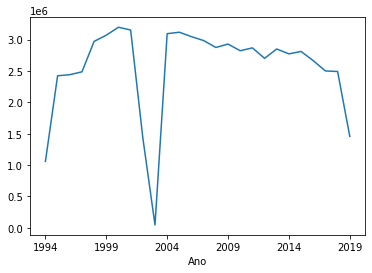

In [12]:
dados_sem_total['075 DTP'].plot()

olhando de forma mais próxima para o período, podemos ver que a mudança foi bastanante significativa

In [13]:
dados_sem_total['075 DTP'][6:12]


Ano
2000    3197754
2001    3153708
2002    1435465
2003      44906
2004    3094882
2005    3118403
Name: 075 DTP, dtype: int64

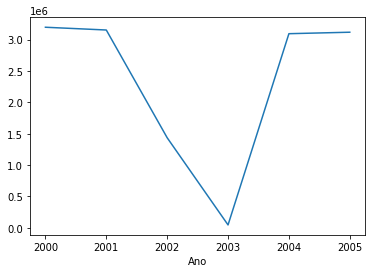

In [14]:
dados_sem_total['075 DTP'][6:12].plot()

Investigando as [Notas técnicas](http://tabnet.datasus.gov.br/cgi/pni/notatecnicaCobertura.pdf),entendemos que 2003 foi o ano que muias vacinas mudaram por conta da inserção da tríplece viral, o que pode ser um indicativo de porque esse dado é tão diferente.

In [15]:
dados_sem_total

,072 BCG,099 Hepatite B em crianças até 30 dias,061 Rotavírus Humano,053 Meningococo C,073 Hepatite B,080 Penta,012 Pneumocócica,074 Poliomielite,100 Poliomielite 4 anos,006 Febre Amarela,096 Hepatite A,091 Pneumocócica(1º ref),092 Meningococo C (1º ref),093 Poliomielite(1º ref),021 Tríplice Viral D1,098 Tríplice Viral D2,097 Tetra Viral(SRC+VZ),075 DTP,102 DTP REF (4 e 6 anos),103 Dupla Adulto (dt),095 Tríplice Bacteriana(DTP)(1º ref),018 Sarampo,009 Haemophilus influenzae b,094 Dupla adulto e tríplice acelular gestante,003 dTpa gestante
Ano,,,,,,,,,,,,,,,,,,,,,,,,,
1994,1442773,-,-,-,144614,-,-,951598,-,86149,-,-,-,-,-,-,-,1058103,-,-,-,1165982,-,-,-
1995,3118425,-,-,-,316010,-,-,2341912,-,144732,-,-,-,-,-,-,-,2423578,-,-,-,2613843,4,-,-
1996,3250708,-,-,-,514762,-,-,2522390,-,176228,-,-,-,-,-,-,-,2441053,-,-,-,2508162,452,-,-
1997,3709941,-,-,-,183338,-,-,2827700,-,248265,-,-,-,-,-,-,-,2486541,-,-,-,3440381,1042,-,-
1998,3568228,-,-,-,403949,-,-,3046858,-,591149,-,-,-,-,-,-,-,2972400,-,-,-,3045492,26714,-,-
1999,3813081,-,-,-,2714650,-,-,3221283,-,944728,-,-,-,-,2622569,-,-,3071205,-,-,-,3228898,165527,-,-
2000,3772892,-,-,-,3075124,-,-,3424919,-,1253896,-,-,-,-,2603164,-,-,3197754,-,-,-,3557231,2966232,-,-
2001,3643993,-,-,-,2973497,-,-,3327803,-,1302294,-,-,-,-,2944931,-,-,3153708,-,-,-,3360925,3012958,-,-
2002,3542563,-,-,-,2938416,-,-,3212628,-,1243045,-,-,-,-,3134799,-,-,1435465,-,-,-,3084612,1252217,-,-


## Objetivo

Esta análise terá como objetivo, realizar análise da vacincação da DTP em geral e por estado

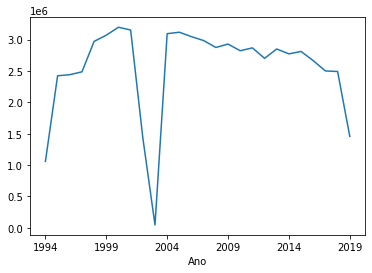

In [16]:
dtp_total = dados_sem_total['075 DTP']
dtp_total.plot()

In [20]:
dtp_total.shape

(26,)

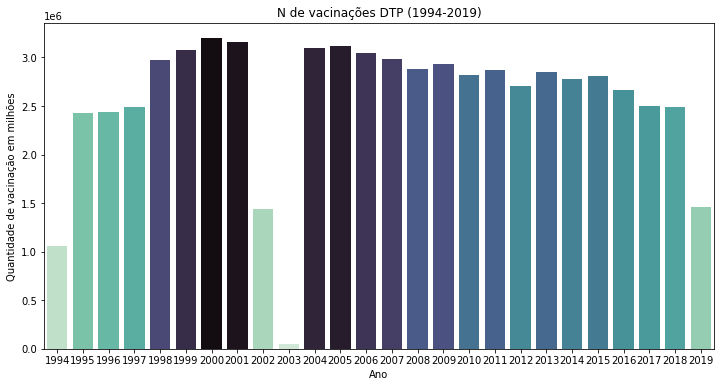

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

vacinacoes_ordenados = dtp_total.rank(method='max').astype(int)
index_ordenados = vacinacoes_ordenados -1
colors = sns.color_palette("mako_r", 26)
palette = [colors[x] for x in index_ordenados]

plt.figure(figsize=(12,6))
vacinacoes_ordenados = dtp_total.rank(method='max').astype(int)
ax = sns.barplot(x=dtp_total.index, y=dtp_total.values, palette=palette, saturation=.7)
ax.set(title='N de vacinações DTP (1994-2019)', ylabel='Quantidade de vacinação em milhões', xlabel='Ano')
plt.show()